In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [345]:
dataset = pd.read_csv(r"D:\dataset\Mobiles_Dataset.csv")
dataset.drop([ 'Description', 'Link'],axis=1, inplace=True)
dataset.head(2)

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.1,48MP + 12MP
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.1,48MP + 12MP


In [346]:
dataset.columns

Index(['Product Name', 'Actual price', 'Discount price', 'Stars', 'Rating',
       'Reviews', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)', 'Camera'],
      dtype='object')

In [347]:
dataset.isnull().sum()

Product Name            0
Actual price            0
Discount price          0
Stars                   0
Rating                  0
Reviews                 0
RAM (GB)                0
Storage (GB)            0
Display Size (inch)     0
Camera                 76
dtype: int64

In [348]:
dataset.describe()

,Stars,Display Size (inch)
count,984.000000,984.000000
mean,4.254980,6.043116
std,0.199734,1.581261
min,3.400000,0.660000
25%,4.200000,6.500000
50%,4.300000,6.670000
75%,4.400000,6.720000
max,5.000000,7.820000


In [349]:
print(dataset.dtypes)

Product Name            object
Actual price            object
Discount price          object
Stars                  float64
Rating                  object
Reviews                 object
RAM (GB)                object
Storage (GB)            object
Display Size (inch)    float64
Camera                  object
dtype: object


# Data Conversion

In [350]:
dataset['Actual price'] = pd.to_numeric(dataset['Actual price'].replace(r'[\\$,₹,]', '', regex=True), errors='coerce')
dataset['Discount price'] = pd.to_numeric(dataset['Discount price'].replace(r'[\\$,₹,]', '', regex=True), errors='coerce')

In [351]:
dataset['Rating'] = dataset['Rating'].astype(str)

In [352]:
dataset['Rating'] = dataset['Rating'].str.replace(' Ratings', '', regex=False)  # Remove ' Ratings'
dataset['Rating'] = dataset['Rating'].str.replace('s', '', regex=False)         # Remove trailing 's'
dataset['Rating'] = dataset['Rating'].str.replace(',', '', regex=False)  

In [353]:
dataset['Rating'] = dataset["Rating"].astype(float)

In [354]:
dataset['Reviews'] = dataset['Reviews'].str.replace(' Reviews', '').str.replace(',', '').astype(float)

In [355]:
# Replace non-numeric values (like 'NIL') with NaN, then convert to float
dataset['RAM (GB)'] = dataset['RAM (GB)'].str.replace('GB', '', regex=True)
dataset['RAM (GB)'] = dataset['RAM (GB)'].replace('NIL', np.nan).astype(float)

In [356]:
dataset['Storage (GB)'] = dataset["Storage (GB)"].replace('NIL', np.nan).astype(float)

In [357]:
dataset['Camera'] = dataset['Camera'].astype(str)

In [358]:
dataset['Camera'] =dataset['Camera'].str.replace('MP',"",regex=False).str.strip()


In [359]:
def split_camera(camera_value):
    parts = camera_value.split('+')
    camera_1 = parts[0].strip()  # First part for Camera_1
    camera_2 = parts[1].strip() if len(parts) > 1 else '0'  # Second part for Camera_2, default to '0'
    
    return pd.Series([camera_1, camera_2])

In [360]:
dataset[['Camera_1', 'Camera_2']] = dataset['Camera'].apply(split_camera)

In [361]:
def clean_camera_value(value):
    # Remove any non-numeric characters except for the decimal point
    cleaned_value = ''.join(filter(lambda x: x.isdigit() or x == '.', value))
    return cleaned_value if cleaned_value else '0'

In [362]:
dataset['Camera_1'] = dataset['Camera_1'].apply(clean_camera_value)
dataset['Camera_2'] = dataset['Camera_2'].apply(clean_camera_value)

In [363]:
dataset['Camera_1'] = dataset['Camera_1'].astype(float)
dataset['Camera_2'] = dataset['Camera_2'].astype(float)

In [364]:
dataset['Product Name'] = dataset['Product Name'].astype(str)

In [365]:
dataset.drop(["Camera"], axis=1,inplace=True)
dataset.isnull().sum()

Product Name             0
Actual price            54
Discount price           4
Stars                    0
Rating                   0
Reviews                  0
RAM (GB)               161
Storage (GB)           109
Display Size (inch)      0
Camera_1                 0
Camera_2                 0
dtype: int64

In [366]:
dataset.head(2)

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera_1,Camera_2
0,"Apple iPhone 15 (Green, 128 GB)",79600.0,65999.0,4.6,44793.0,2402.0,NaN,128.0,6.1,48.0,12.0
1,"Apple iPhone 15 (Blue, 128 GB)",79600.0,65999.0,4.6,44793.0,2402.0,NaN,128.0,6.1,48.0,12.0


In [367]:
print(dataset.dtypes)

Product Name            object
Actual price           float64
Discount price         float64
Stars                  float64
Rating                 float64
Reviews                float64
RAM (GB)               float64
Storage (GB)           float64
Display Size (inch)    float64
Camera_1               float64
Camera_2               float64
dtype: object


In [368]:
dataset.columns

Index(['Product Name', 'Actual price', 'Discount price', 'Stars', 'Rating',
       'Reviews', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)',
       'Camera_1', 'Camera_2'],
      dtype='object')

# Categorize with their brand name

In [369]:
#unique_products = dataset['Product Name'].unique()
#print("Unique Product Names:", unique_products)

In [370]:
def extract_brand(product_name):
    # Assuming the brand name is the first word before any space
    return product_name.split()[0]

In [371]:
dataset['Brand'] = dataset['Product Name'].apply(extract_brand)


In [372]:
grouped_products = dataset.groupby('Brand')['Product Name'].apply(list).to_dict()

In [373]:
print("Categorized Products by Brand:")
for brand, products in grouped_products.items():
    print(f"{brand}: {products}")

Categorized Products by Brand:
Apple: ['Apple iPhone 15 (Green, 128 GB)', 'Apple iPhone 15 (Blue, 128 GB)', 'Apple iPhone 15 (Black, 128 GB)', 'Apple iPhone 15 Plus (Yellow, 128 GB)', 'Apple iPhone 14 Plus (Purple, 512 GB)', 'Apple iPhone 14 ((PRODUCT)RED, 128 GB)', 'Apple iPhone 14 (Starlight, 128 GB)', 'Apple iPhone 14 Plus (Starlight, 128 GB)', 'Apple iPhone 15 (Green, 256 GB)', 'Apple iPhone 15 (Green, 256 GB)', 'Apple iPhone 15 (Black, 256 GB)', 'Apple iPhone 15 (Black, 256 GB)', 'Apple iPhone 15 (Black, 512 GB)', 'Apple iPhone 15 (Yellow, 128 GB)', 'Apple iPhone 15 (Yellow, 128 GB)', 'Apple iPhone 15 Plus (Pink, 128 GB)', 'Apple iPhone 14 Plus (Blue, 128 GB)', 'Apple iPhone 14 Plus (Blue, 512 GB)', 'Apple iPhone 14 (Purple, 128 GB)', 'Apple iPhone 15 (Pink, 128 GB)', 'Apple iPhone 14 Plus (Midnight, 128 GB)', 'Apple iPhone 14 Plus (Midnight, 512 GB)', 'Apple iPhone 14 (Midnight, 128 GB)', 'Apple iPhone 14 (Midnight, 128 GB)', 'Apple iPhone 15 Plus (Black, 128 GB)', 'Apple iPhone 

In [374]:
columns = ['Brand'] + [col for col in dataset.columns if col != 'Brand']
dataset = dataset[columns]

In [375]:
dataset.head(2)

,Brand,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera_1,Camera_2
0,Apple,"Apple iPhone 15 (Green, 128 GB)",79600.0,65999.0,4.6,44793.0,2402.0,NaN,128.0,6.1,48.0,12.0
1,Apple,"Apple iPhone 15 (Blue, 128 GB)",79600.0,65999.0,4.6,44793.0,2402.0,NaN,128.0,6.1,48.0,12.0


# Handling Null Values

In [376]:
dataset.isnull().sum()

Brand                    0
Product Name             0
Actual price            54
Discount price           4
Stars                    0
Rating                   0
Reviews                  0
RAM (GB)               161
Storage (GB)           109
Display Size (inch)      0
Camera_1                 0
Camera_2                 0
dtype: int64

In [377]:
null_values_per_brand = dataset.groupby('Brand')['RAM (GB)'].apply(lambda x: x.isnull().sum())
print("Null values in RAM (GB) per brand:")
print(null_values_per_brand)

Null values in RAM (GB) per brand:
Brand
Apple        39
BlackZone     3
CMF           0
Google        0
Honor         0
I             3
IQOO          0
Infinix       0
Jio           2
KARBONN       9
Kechaoda     20
LAVA         23
MOTOROLA      3
Micromax      3
Motorola      3
Nokia        24
Nothing       0
OPPO          0
OnePlus       0
POCO          0
REDMI         0
SAMSUNG       0
Samsung       0
Tecno         0
Vox           2
Xiaomi        0
itel         27
realme        0
vivo          0
Name: RAM (GB), dtype: int64


In [378]:
mean_actual_price_per_brand = dataset.groupby('Brand')['Actual price'].mean()
print(mean_actual_price_per_brand)

Brand
Apple        78084.615385
BlackZone     2199.000000
CMF          20999.000000
Google       61229.769231
Honor        39499.000000
I             2865.666667
IQOO         22699.050000
Infinix      16059.000000
Jio           2749.000000
KARBONN       1412.222222
Kechaoda      1562.850000
LAVA          4294.806452
MOTOROLA      6157.333333
Micromax      5420.500000
Motorola     23148.344828
Nokia         3921.576923
Nothing      33199.000000
OPPO         24984.507246
OnePlus      43276.777778
POCO         20700.612903
REDMI        21381.352941
SAMSUNG      38301.857143
Samsung      69999.000000
Tecno        16672.913043
Vox           1649.000000
Xiaomi       63749.000000
itel          4734.340426
realme       24291.682927
vivo         28777.870130
Name: Actual price, dtype: float64


Grouping each brand and taking mean of each brand to replace in null value of that brand

In [379]:
# Actual Values
samsung_mean_price = dataset[dataset['Brand'] == 'SAMSUNG']['Actual price'].mean()
Nokia_mean_price = dataset[dataset['Brand'] == 'Nokia']['Actual price'].mean()
Oppo_mean_price = dataset[dataset['Brand'] == 'OPPO']['Actual price'].mean()
vivo_mean_price = dataset[dataset['Brand'] == 'vivo']['Actual price'].mean()
Google_mean_price = dataset[dataset['Brand'] == 'Google']['Actual price'].mean()
Redmi_mean_price = dataset[dataset['Brand'] == 'REDMI']['Actual price'].mean()
Oneplus_mean_price = dataset[dataset['Brand'] == 'OnePlus']['Actual price'].mean()
realme_mean_price = dataset[dataset['Brand'] == 'realme']['Actual price'].mean()
LAVA_mean_price = dataset[dataset['Brand'] == 'LAVA']['Actual price'].mean()
infinix_mean_price = dataset[dataset['Brand'] == 'Infinix']['Actual price'].mean()
Itel_mean_price = dataset[dataset['Brand'] == 'itel']['Actual price'].mean()


In [380]:
dataset.loc[(dataset['Brand'] == 'SAMSUNG') & (dataset['Actual price'].isnull()), 'Actual price'] = samsung_mean_price
dataset.loc[(dataset['Brand'] == 'Nokia') & (dataset['Actual price'].isnull()), 'Actual price'] = Nokia_mean_price
dataset.loc[(dataset['Brand'] == 'OPPO') & (dataset['Actual price'].isnull()), 'Actual price'] = Oppo_mean_price
dataset.loc[(dataset['Brand'] == 'vivo') & (dataset['Actual price'].isnull()), 'Actual price'] = vivo_mean_price
dataset.loc[(dataset['Brand'] == 'REDMI') & (dataset['Actual price'].isnull()), 'Actual price'] = Redmi_mean_price
dataset.loc[(dataset['Brand'] == 'Google') & (dataset['Actual price'].isnull()), 'Actual price'] = Google_mean_price
dataset.loc[(dataset['Brand'] == 'OnePlus') & (dataset['Actual price'].isnull()), 'Actual price'] = Oneplus_mean_price
dataset.loc[(dataset['Brand'] == 'realme') & (dataset['Actual price'].isnull()), 'Actual price'] = realme_mean_price
dataset.loc[(dataset['Brand'] == 'LAVA') & (dataset['Actual price'].isnull()), 'Actual price'] = LAVA_mean_price
dataset.loc[(dataset['Brand'] == 'itel') & (dataset['Actual price'].isnull()), 'Actual price'] = Itel_mean_price
dataset.loc[(dataset['Brand'] == 'Infinix') & (dataset['Actual price'].isnull()), 'Actual price'] = infinix_mean_price

In [381]:
# Mean of discouted Rate 
LAVA_dis_price = dataset[dataset['Brand'] == 'LAVA']['Discount price'].mean()
Itel_dis_price = dataset[dataset['Brand'] == 'itel']['Discount price'].mean()
Redmi_dis_price = dataset[dataset['Brand'] == 'REDMI']['Discount price'].mean()

In [382]:
dataset.loc[(dataset['Brand'] == 'LAVA') & (dataset['Discount price'].isnull()), 'Discount price'] = LAVA_dis_price
dataset.loc[(dataset['Brand'] == 'itel') & (dataset['Discount price'].isnull()), 'Discount price'] = Itel_dis_price
dataset.loc[(dataset['Brand'] == 'REDMI') & (dataset['Discount price'].isnull()), 'Discount price'] = Redmi_dis_price

In [383]:
# Iterate over each brand and replace null values with median
brands = dataset['Brand'].unique()  # Get all unique brands

for brand in brands:
    # Calculate median for the current brand
    median_ram = dataset[dataset['Brand'] == brand]['RAM (GB)'].median()
    
    # Replace null values with the median
    dataset.loc[(dataset['Brand'] == brand) & (dataset['RAM (GB)'].isnull()), 'RAM (GB)'] = median_ram
    
    # Print the median value for confirmation
    print(f"{brand} RAM price (median): {median_ram}")

# Check the number of null values after replacement
null_values_after_replacement = dataset['RAM (GB)'].isnull().sum()
print(f"Null values in 'RAM (GB)' after replacement: {null_values_after_replacement}")


Apple RAM price (median): nan
OnePlus RAM price (median): 8.0
SAMSUNG RAM price (median): 8.0
CMF RAM price (median): 7.0
vivo RAM price (median): 8.0
OPPO RAM price (median): 8.0
Motorola RAM price (median): 8.0
MOTOROLA RAM price (median): 4.0
Nothing RAM price (median): 8.0
itel RAM price (median): 4.0
realme RAM price (median): 8.0
Nokia RAM price (median): 4.0
Infinix RAM price (median): 8.0
Tecno RAM price (median): 8.0
Google RAM price (median): 8.0
LAVA RAM price (median): 8.0
IQOO RAM price (median): 8.0
POCO RAM price (median): 8.0
Xiaomi RAM price (median): 12.0
REDMI RAM price (median): 6.0
Micromax RAM price (median): 4.0
Vox RAM price (median): nan
Kechaoda RAM price (median): nan
Honor RAM price (median): 8.0
I RAM price (median): nan
KARBONN RAM price (median): nan
BlackZone RAM price (median): nan
Jio RAM price (median): nan
Samsung RAM price (median): 8.0
Null values in 'RAM (GB)' after replacement: 78


In [384]:
# Handling Ram
dataset.loc[(dataset['Brand'] == 'Apple') & (dataset['RAM (GB)'].isnull()), 'RAM (GB)'] = 12



In [385]:
brands_to_replace = ['Kechaoda','KARBONN', 'I','Vox', 'BlackZone', 'Jio']
dataset.loc[
    (dataset['Brand'].isin(brands_to_replace)) & 
    (dataset['RAM (GB)'].isnull()), 
    'RAM (GB)'] = 0

In [386]:
null_values_after_replacement = dataset['RAM (GB)'].isnull().sum()
print(f"Null values in 'RAM (GB)' after replacement: {null_values_after_replacement}")
print(dataset[dataset['Brand'].isin(brands_to_replace)])

Null values in 'RAM (GB)' after replacement: 0
         Brand                                       Product Name  \
94         Vox                                            Vox V16   
106   Kechaoda                                      Kechaoda K115   
124   Kechaoda                                        Kechaoda K9   
164          I                                          I Kall A2   
200   Kechaoda                                 Kechaoda A26_black   
201   Kechaoda                                 Kechaoda A26_black   
204          I                            I Kall K29-Pro 4G Phone   
233    KARBONN  KARBONN K110i Dual Sim Keypad Phone|1000 mAh B...   
234    KARBONN  KARBONN K110i Dual Sim Keypad Phone|1000 mAh B...   
275   Kechaoda                                      Kechaoda K112   
321    KARBONN  KARBONN K531 Dual Sim Keypad Phone|1750 mAh Ba...   
323   Kechaoda                                      Kechaoda K115   
351    KARBONN  KARBONN K110i Dual Sim Keypad Phone|1000

In [387]:
# Handling Storage

brands_to_replace = ['itel','Kechaoda','KARBONN', 'I','Vox','LAVA', 'BlackZone', 'Nokia', 'Micromax', 'Motorola', 'Jio']
dataset.loc[
    (dataset['Brand'].isin(brands_to_replace)) & 
    (dataset['Storage (GB)'].isnull()), 
    'Storage (GB)'] = 0

In [388]:
null_values_per_brand = dataset.groupby('Brand')['Storage (GB)'].apply(lambda x: x.isnull().sum())
print("Null values in RAM (GB) per brand:")
print(null_values_per_brand)

Null values in RAM (GB) per brand:
Brand
Apple        0
BlackZone    0
CMF          0
Google       0
Honor        0
I            0
IQOO         0
Infinix      0
Jio          0
KARBONN      0
Kechaoda     0
LAVA         0
MOTOROLA     0
Micromax     0
Motorola     0
Nokia        0
Nothing      0
OPPO         0
OnePlus      0
POCO         0
REDMI        0
SAMSUNG      0
Samsung      0
Tecno        0
Vox          0
Xiaomi       0
itel         0
realme       0
vivo         0
Name: Storage (GB), dtype: int64


In [389]:
dataset.isnull().sum()

Brand                  0
Product Name           0
Actual price           0
Discount price         0
Stars                  0
Rating                 0
Reviews                0
RAM (GB)               0
Storage (GB)           0
Display Size (inch)    0
Camera_1               0
Camera_2               0
dtype: int64

In [390]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=apple_data, y='Discount price')
# plt.title("Boxplot for Apple Actual Price")
# plt.ylabel("Actual Price")
# plt.show()

In [391]:
dataset.isnull().sum()

Brand                  0
Product Name           0
Actual price           0
Discount price         0
Stars                  0
Rating                 0
Reviews                0
RAM (GB)               0
Storage (GB)           0
Display Size (inch)    0
Camera_1               0
Camera_2               0
dtype: int64

In [392]:
null_values_per_brand = dataset.groupby('Brand')['RAM (GB)'].apply(lambda x: x.isnull().sum())

In [393]:
print("Null values in RAM (GB) per brand:")
print(null_values_per_brand)

Null values in RAM (GB) per brand:
Brand
Apple        0
BlackZone    0
CMF          0
Google       0
Honor        0
I            0
IQOO         0
Infinix      0
Jio          0
KARBONN      0
Kechaoda     0
LAVA         0
MOTOROLA     0
Micromax     0
Motorola     0
Nokia        0
Nothing      0
OPPO         0
OnePlus      0
POCO         0
REDMI        0
SAMSUNG      0
Samsung      0
Tecno        0
Vox          0
Xiaomi       0
itel         0
realme       0
vivo         0
Name: RAM (GB), dtype: int64


In [394]:
dataset.columns

Index(['Brand', 'Product Name', 'Actual price', 'Discount price', 'Stars',
       'Rating', 'Reviews', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)',
       'Camera_1', 'Camera_2'],
      dtype='object')

# Exploratory Data Analysis (EDA)

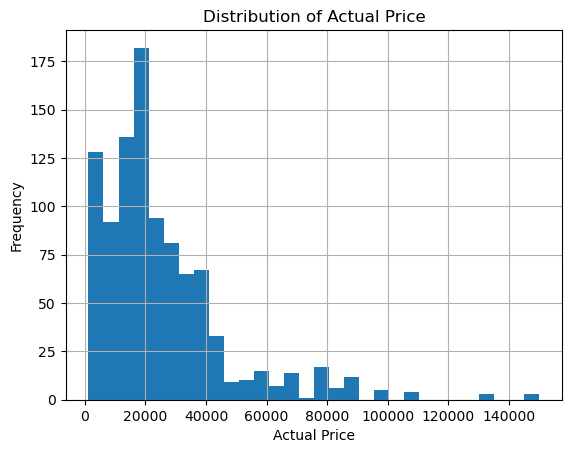

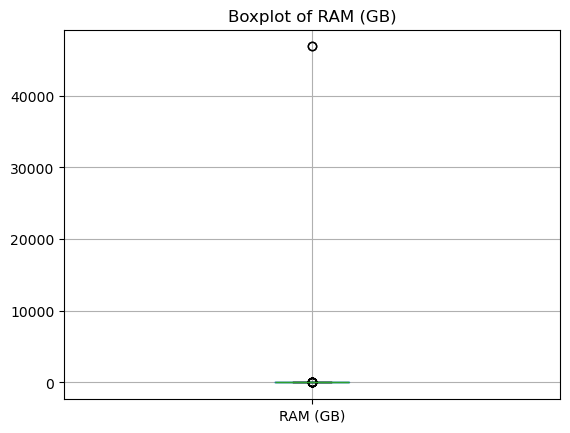

In [395]:
# Histogram for distribution of 'Actual price'
dataset['Actual price'].hist(bins=30)
plt.title('Distribution of Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for outliers in 'RAM (GB)'
dataset.boxplot(column=['RAM (GB)'])
plt.title('Boxplot of RAM (GB)')
plt.show()


In [396]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [397]:
label_encoder = LabelEncoder()
dataset['Brand_encoded'] = label_encoder.fit_transform(dataset['Brand'])


In [398]:
num_unique_brands = len(dataset['Brand_encoded'].unique())

In [399]:
embedding_dim = 8

In [400]:
dataset.head(1)

,Brand,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera_1,Camera_2,Brand_encoded
0,Apple,"Apple iPhone 15 (Green, 128 GB)",79600.0,65999.0,4.6,44793.0,2402.0,12.0,128.0,6.1,48.0,12.0,0


In [401]:
dataset.columns

Index(['Brand', 'Product Name', 'Actual price', 'Discount price', 'Stars',
       'Rating', 'Reviews', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)',
       'Camera_1', 'Camera_2', 'Brand_encoded'],
      dtype='object')

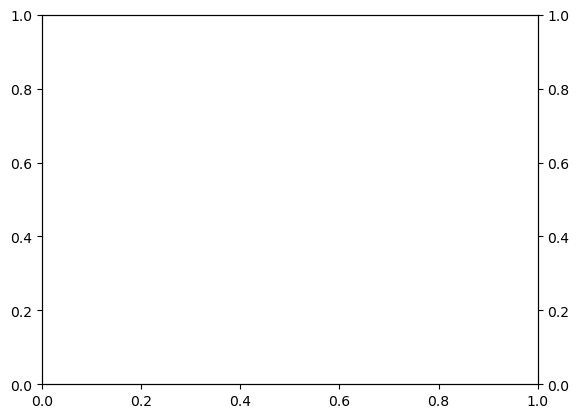

In [402]:
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()  # Create a twin axes sharing the x-axis

C:\Users\Scaleable Solutions\AppData\Local\Temp\ipykernel_1560\146259943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Actual price', data=dataset, palette='viridis')


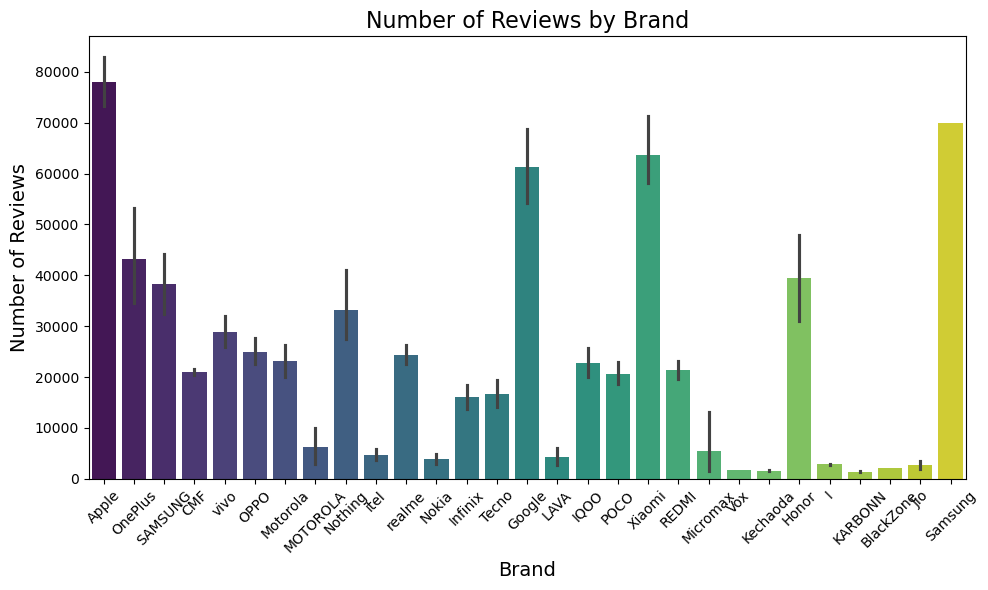

In [403]:
# Create a bar plot for brand reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Actual price', data=dataset, palette='viridis')
plt.title('Number of Reviews by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()

C:\Users\Scaleable Solutions\AppData\Local\Temp\ipykernel_1560\428791840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Brand', y='Actual price', data=dataset, palette='viridis', jitter=True)


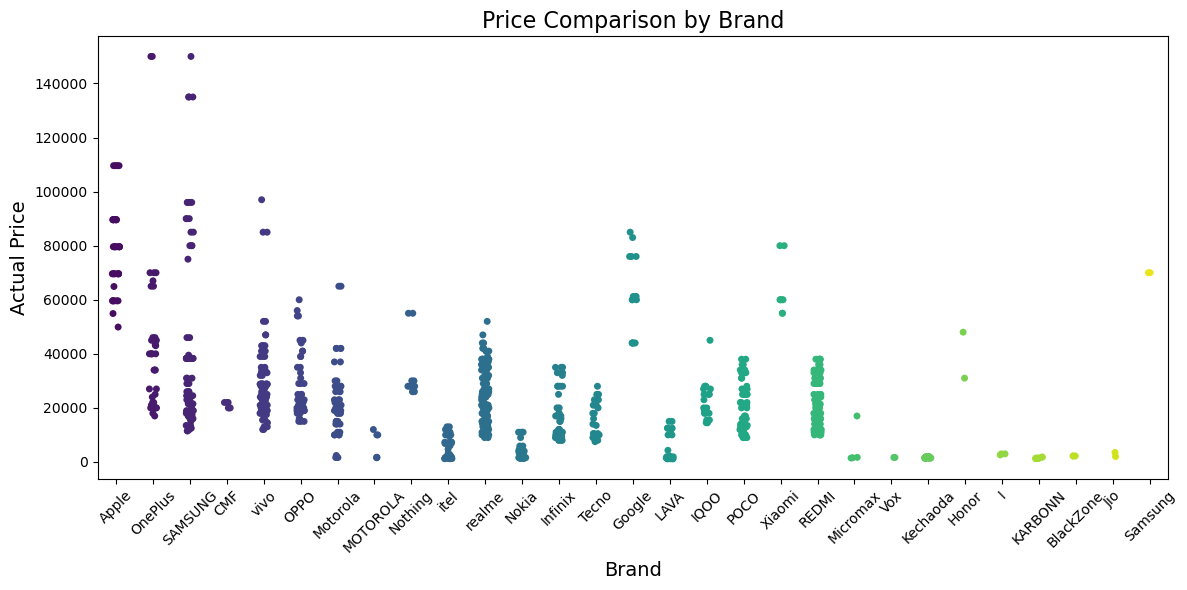

In [404]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Brand', y='Actual price', data=dataset, palette='viridis', jitter=True)

# Add title and labels
plt.title('Price Comparison by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Actual Price', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

              Actual price  RAM (GB)  Storage (GB)  Camera_1  Camera_2
Actual price      1.000000 -0.039653      0.561957  0.062701  0.499621
RAM (GB)         -0.039653  1.000000     -0.013217 -0.009407 -0.021104
Storage (GB)      0.561957 -0.013217      1.000000  0.090237  0.306463
Camera_1          0.062701 -0.009407      0.090237  1.000000 -0.055463
Camera_2          0.499621 -0.021104      0.306463 -0.055463  1.000000


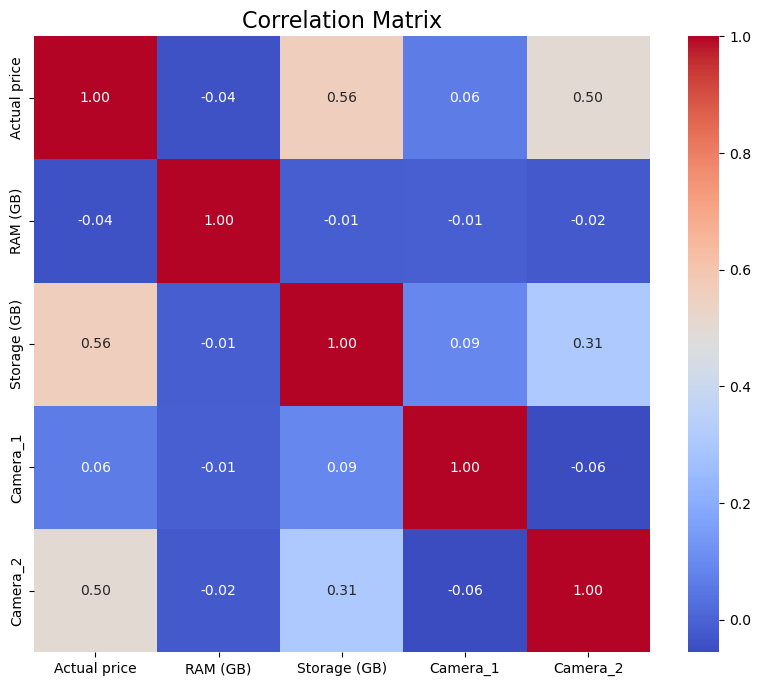

In [405]:
# Calculate the correlation matrix
correlation_matrix = dataset[['Actual price', 'RAM (GB)', 'Storage (GB)', 'Camera_1', 'Camera_2']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


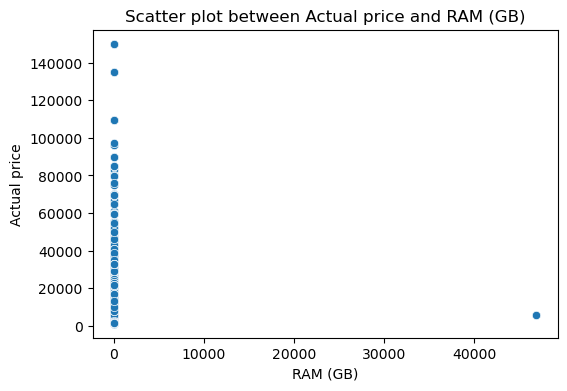

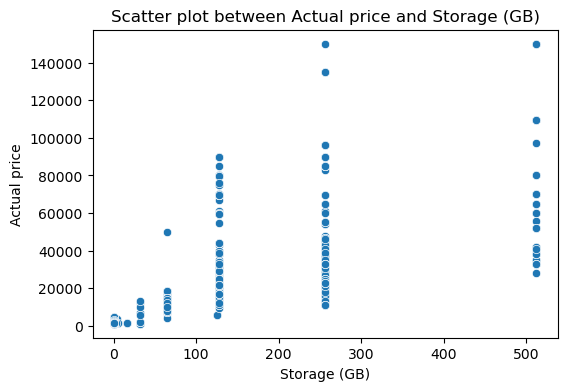

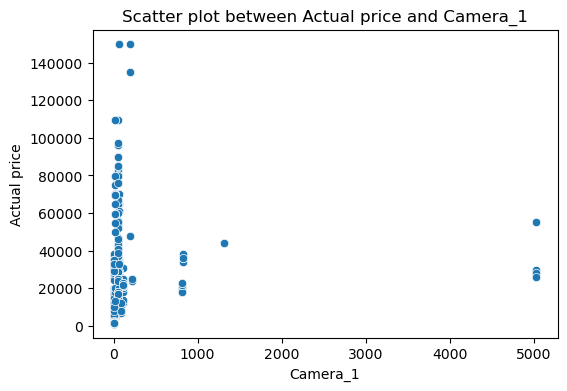

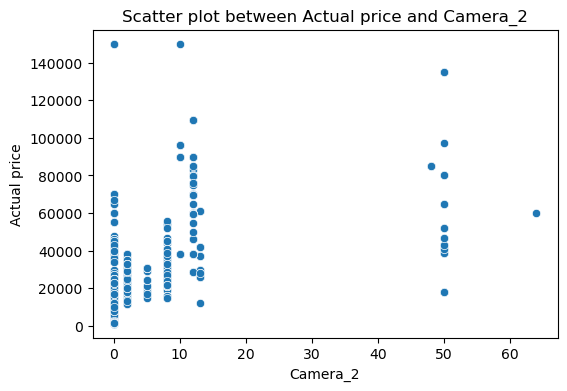

In [406]:
features = ['RAM (GB)', 'Storage (GB)', 'Camera_1', 'Camera_2']
target = 'Actual price'

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=dataset[feature], y=dataset[target])
    plt.title(f'Scatter plot between {target} and {feature}')
    plt.show()

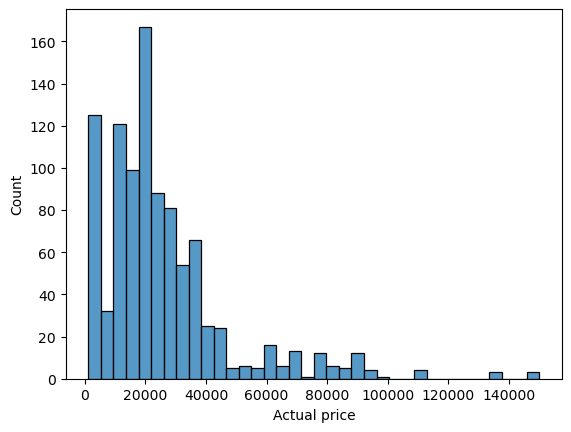

In [407]:
sns.histplot(dataset['Actual price'])
plt.show()



In [408]:
# sns.scatterplot(x='Actual price', y='Reviews', hue='Brand', data=dataset)
# sns.scatterplot(x='RAM (GB)', y='Reviews', hue='Brand', data=dataset)

In [409]:
X = dataset.drop(['Brand', 'Product Name','Actual price','Display Size (inch)', 'Brand_encoded', 'Discount price', 'Stars', 'Reviews' ], axis=1) 
y = dataset['Actual price']


# MAachine learning Models

In [410]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [411]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

     Rating  RAM (GB)  Storage (GB)  Camera_1  Camera_2
0  0.104293  0.000256         0.250  0.009539    0.1875
1  0.104293  0.000256         0.250  0.009539    0.1875
2  0.104293  0.000256         0.250  0.009539    0.1875
3  0.002331  0.000085         0.250  0.009936    0.0000
4  0.002331  0.000085         0.125  0.009936    0.0000


In [412]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [413]:
from sklearn.tree import DecisionTreeRegressor

In [414]:
sample_weights = dataset['Brand'].apply(lambda x: 2 if x in ['Apple', 'Samsung'] else 1)

In [415]:
model = DecisionTreeRegressor(random_state=42)

In [416]:
model.fit(X_train, y_train, )

DecisionTreeRegressor(random_state=42)

In [417]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_test)

In [418]:
y_pred = model.predict(X_test)

In [419]:
model.score(X_test, y_test)

0.9591524074567874

In [420]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 1458.8225469556098
Mean Squared Error (MSE): 25891259.442824166
Root Mean Squared Error (RMSE): 5088.345452386676
R² Score: 0.9591524074567874


In [421]:
from sklearn.tree import plot_tree


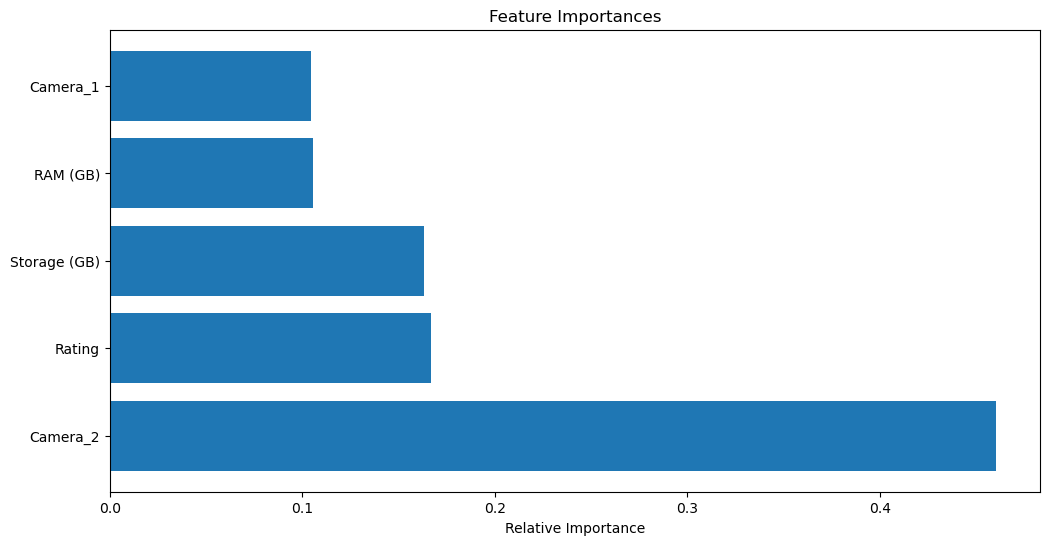

In [422]:
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel("Relative Importance")
plt.show()


In [432]:
model.predict([[44793, 8, 128, 48, 12]])

array([134999.])

In [424]:
comparison_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred})

In [434]:
print(comparison_df.head(15))

     Actual Values  Predicted Values
613    28777.87013       21591.95671
451    11999.00000       13999.00000
731    11999.00000       13999.00000
436    84999.00000       84999.00000
275     1799.00000        1999.00000
582    89600.00000       89600.00000
707    74999.00000       69999.00000
299    30999.00000       30999.00000
718    15999.00000       15999.00000
494     8999.00000        7499.00000
351     1240.00000        1240.00000
594    40999.00000       40999.00000
652    20999.00000       20999.00000
865    15999.00000       15999.00000
294    20999.00000       20999.00000


In [426]:
from sklearn.metrics import accuracy_score, classification_report

In [427]:
y_pred_rf_train = model.predict(X_train)  # Predictions on training set
y_pred_rf_test = model.predict(X_test) 

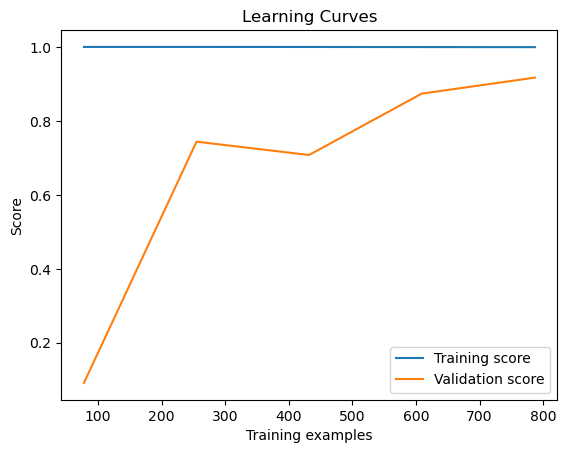

In [428]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()


In [429]:
import joblib

# Assuming 'model' is your DecisionTreeRegressor
joblib.dump(model, 'model.pkl')

['model.pkl']

In [430]:
model = joblib.load('model.pkl')